# ANN for classification, Heart disease class classification

#### In this assignement i used mostly the example given in class as a base and made some modefication sometimes using AI to help me out when i was stuck.

#### When AI was used i have marked it in the cells 

In [ ]:
import pandas as pd, csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

### Part 1 : Turn all the objects columns in the dataframe to integers 

In [ ]:

# load the data
df = pd.read_csv('Heart Disease.csv')


# see the column explanations here 
df.head()  


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [36]:
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")
    print(df[column].value_counts())
    print("--------------------------")

HeartDisease: 2 unique values
HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64
--------------------------
BMI: 3604 unique values
BMI
26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
59.85       1
50.59       1
92.53       1
62.95       1
46.56       1
Name: count, Length: 3604, dtype: int64
--------------------------
Smoking: 2 unique values
Smoking
No     187887
Yes    131908
Name: count, dtype: int64
--------------------------
AlcoholDrinking: 2 unique values
AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64
--------------------------
Stroke: 2 unique values
Stroke
No     307726
Yes     12069
Name: count, dtype: int64
--------------------------
PhysicalHealth: 31 unique values
PhysicalHealth
0     226589
30     19509
2      14880
1      10489
3       8617
5       7606
10      5453
15      5012
7       4629
4       4468
20      3216
14      2893
6       1270
25      1164
8        924
21       626
12       605
28

In [37]:
data = df.select_dtypes(include=['object'])

In [38]:
df.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [39]:
df = df.drop(columns=['SkinCancer'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

- *Why i was stuck* I was unsure how to encode age ranges without losing their natural order.
- *How ChatGPT helped:* ChatGPT suggested mapping each range to its midpoint to preserve ordinality for modeling.
- *What I learned:* I learned that ordinal categories should keep order information like midpoints.

In [ ]:
# This cell’s approach was assisted by ChatGPT.
age_map = {
    '18-24': 21, '25-29': 27, '30-34': 32, '35-39': 37, '40-44': 42,
    '45-49': 47, '50-54': 52, '55-59': 57, '60-64': 62, '65-69': 67,
    '70-74': 72, '75-79': 77, '80 or older': 82
}

df['AgeCategory'] = df['AgeCategory'].map(age_map)

In [42]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,No,16.60,Yes,No,No,3,30,No,Female,57,White,Yes,Yes,Very good,5,Yes,No
1,No,20.34,No,No,Yes,0,0,No,Female,82,White,No,Yes,Very good,7,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,67,White,Yes,Yes,Fair,8,Yes,No
3,No,24.21,No,No,No,0,0,No,Female,77,White,No,No,Good,6,No,No
4,No,23.71,No,No,No,28,0,Yes,Female,42,White,No,Yes,Very good,8,No,No


In [43]:
data = df.select_dtypes(include=['object'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   HeartDisease      319795 non-null  object
 1   Smoking           319795 non-null  object
 2   AlcoholDrinking   319795 non-null  object
 3   Stroke            319795 non-null  object
 4   DiffWalking       319795 non-null  object
 5   Sex               319795 non-null  object
 6   Race              319795 non-null  object
 7   Diabetic          319795 non-null  object
 8   PhysicalActivity  319795 non-null  object
 9   GenHealth         319795 non-null  object
 10  Asthma            319795 non-null  object
 11  KidneyDisease     319795 non-null  object
dtypes: object(12)
memory usage: 29.3+ MB
None


In [ ]:
# since we are doing classification, we have to process our target values with an encoder
# and convert them into a categorical TensorFlow/Keras -format 
le = LabelEncoder()

for col in data.columns:
    data[col] = le.fit_transform(data[col])

In [45]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   HeartDisease      319795 non-null  int64
 1   Smoking           319795 non-null  int64
 2   AlcoholDrinking   319795 non-null  int64
 3   Stroke            319795 non-null  int64
 4   DiffWalking       319795 non-null  int64
 5   Sex               319795 non-null  int64
 6   Race              319795 non-null  int64
 7   Diabetic          319795 non-null  int64
 8   PhysicalActivity  319795 non-null  int64
 9   GenHealth         319795 non-null  int64
 10  Asthma            319795 non-null  int64
 11  KidneyDisease     319795 non-null  int64
dtypes: int64(12)
memory usage: 29.3 MB
None


In [46]:
data.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease
0,0,1,0,0,0,0,5,2,1,4,1,0
1,0,0,0,1,0,0,5,0,1,4,0,0
2,0,1,0,0,0,1,5,2,1,1,1,0
3,0,0,0,0,0,0,5,0,0,2,0,0
4,0,0,0,0,1,0,5,0,1,4,0,0


In [47]:
df[data.columns] = data

In [48]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,0,16.60,1,0,0,3,30,0,0,57,5,2,1,4,5,1,0
1,0,20.34,0,0,1,0,0,0,0,82,5,0,1,4,7,0,0
2,0,26.58,1,0,0,20,30,0,1,67,5,2,1,1,8,1,0
3,0,24.21,0,0,0,0,0,0,0,77,5,0,0,2,6,0,0
4,0,23.71,0,0,0,28,0,1,0,42,5,0,1,4,8,0,0


### Feature Selection 
Ranked features by chi-square scores against the target to understand importance and optionally select top-K.

**Let's try the SelectKBest and compare it to correlation matrix**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat, y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format


# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns, df_features], axis=1)
f_scores.columns = ['Features', 'Score']
f_scores = f_scores.sort_values(by='Score', ascending=False)

print(f_scores)

            Features     Score
4     PhysicalHealth 174751.53
8        AgeCategory 102479.41
10          Diabetic  15526.41
3             Stroke  11922.58
6        DiffWalking  11154.41
15     KidneyDisease   6493.65
5       MentalHealth   4243.69
1            Smoking   2181.95
0                BMI   1239.62
7                Sex    823.20
11  PhysicalActivity    718.81
14            Asthma    475.65
2    AlcoholDrinking    306.69
9               Race    129.83
12         GenHealth     41.50
13         SleepTime      6.44


In [ ]:
# based on the results of correlation matrix, SelectKBest, Fisher's Score, 
# VIF-test, manual analysis etc etc.
# You can choose which variables to keep and which to drop

### train/test/validation -split

In [50]:
!pip install imbalanced-learn

In [ ]:
# [AI-ASSISTED] I was stuck and used ChatGPT for guidance. beacause of imbalanced data.

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

X = pd.DataFrame(X_scaled, columns=X.columns)

# this time, let's split the data into 65% (training data) and 35% (temporary data)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35)

# step 2, split the temporary data in HALF (0.5) => 17.5% test and 17.5% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

### In this cell AI suggested using sigmoid activation for binary classification instead of softmax.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

# define categories based on unique values in the target variable
categories = y.unique()   

# modify the input shape to match your training column count
# remember, one of the columns is removed from training columns
# to be the target value. so if your data originally had 10 columns
# the input shape is 9 ... (10 - 1 => 9)
# the input layer itself can have a different number of nodes
# Tip: have at least the same number of nodes as in the input shape
# output layer in classification depends on amount of output options in target variable
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dense(8, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ]
)

# compile the model, this time we use categorical crossentropy for loss -function
# and we also measure the accuracy of our model in the metrics
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 32 (128.00 B)

**Batch Size Choice**  
- *Why I was stuck:* I noticed training was using the entire dataset as a single batch, which was slow and unstable.
- *How ChatGPT helped:* ChatGPT suggested setting `batch_size=1024` to use mini-batches for more stable updates.
- *What I learned:* I learned why mini-batch training is preferable to full-batch in practice.

In [ ]:
#I was stuck and used ChatGPT for guidance.

model.fit(
    x=X_train,
    y=y_train,
    epochs=300,
    batch_size=1024,                     
    validation_data=(X_val, y_val)
)

Epoch 1/300
372/372 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5359 - loss: 4.4448 - val_accuracy: 0.7179 - val_loss: 0.8116
Epoch 2/300
372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7100 - loss: 0.6714 - val_accuracy: 0.7248 - val_loss: 0.5953
Epoch 3/300
372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7281 - loss: 0.5873 - val_accuracy: 0.7344 - val_loss: 0.5717
Epoch 4/300
372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7361 - loss: 0.5651 - val_accuracy: 0.7368 - val_loss: 0.5579
Epoch 5/300
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7383 - loss: 0.5539 - val_accuracy: 0.7377 - val_loss: 0.5513
Epoch 6/300
372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7400 - loss: 0.5464 - val_accuracy: 0.7393 - val_loss: 0.5469
Epoch 7/300
372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7421 - loss: 0.5416 - val_accuracy: 0.7385 - val_loss: 0.5448
Epoch 8/300
372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7404 - loss: 0.5420 - val_

### Error and performance metrics

<Axes: >

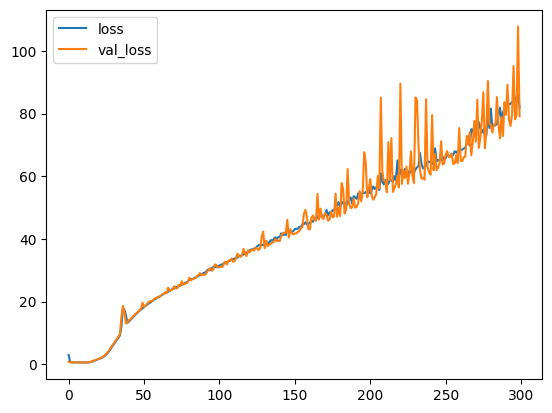

In [54]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

# the model seems to learn fairly well according to loss, not overfitting
# slight room for improvement

<Axes: >

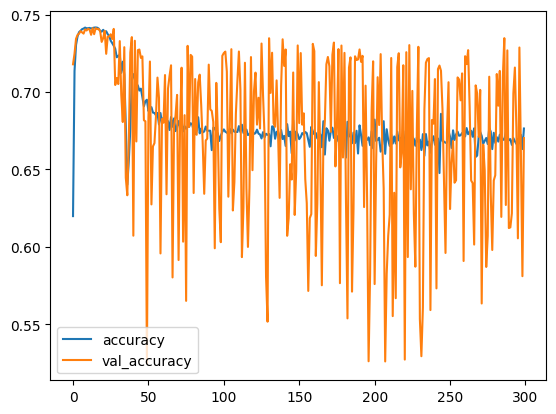

In [55]:
# the validation accuracy is quite high (which is the result from the test dataset)
# training accuracy is a bit low, but val_accuracy is usually more important to maximize
# training accuracy being low implies there's room for improvement still in the model
loss_df[['accuracy', 'val_accuracy']].plot()

In [56]:
# compare the final model loss/accuracy/evaluation values
# the values should again match mostly
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[79.07410430908203, 0.6721577644348145]

Train data evaluation:
[79.0279541015625, 0.6737060546875]


In [57]:
print(y_test.shape)

(102348,)


In [62]:
# get model predictions
test_predictions = (model.predict(X_test) > 0.5).astype("int32")


3199/3199 ━━━━━━━━━━━━━━━━━━━━ 3s 980us/step


In [63]:
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions, digits=3))

[[34336 16965]
 [16589 34458]]
              precision    recall  f1-score   support

           0      0.674     0.669     0.672     51301
           1      0.670     0.675     0.673     51047

    accuracy                          0.672    102348
   macro avg      0.672     0.672     0.672    102348
weighted avg      0.672     0.672     0.672    102348



<Axes: >

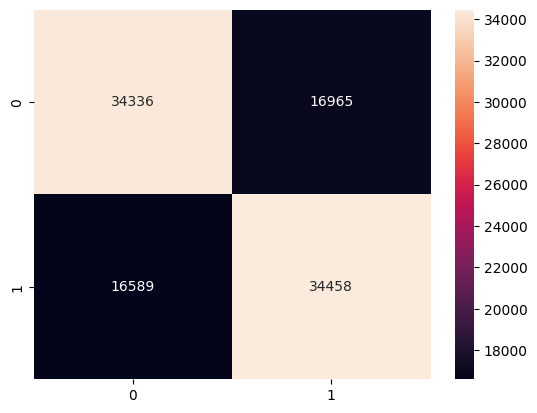

In [64]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=categories, yticklabels=categories)

In [ ]:
# convert categories to strings so classification_report doesn't break
target_names = [str(c) for c in categories]   # used AI for this only for the categories

# print the classification report based on true values and predictions
print(classification_report(y_test, test_predictions, target_names=target_names))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67     51301
           1       0.67      0.68      0.67     51047

    accuracy                           0.67    102348
   macro avg       0.67      0.67      0.67    102348
weighted avg       0.67      0.67      0.67    102348


Model overall accuracy: 67.22%


In [67]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary classification, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multi category classification , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# get ROC-AUC -score
roc_auc_score(y, model.predict(X), multi_class="ovr")

18277/18277 ━━━━━━━━━━━━━━━━━━━━ 18s 992us/step


0.7299379941351991

Very poor ROC-AUC score 

### Test the model in practice with new data

In [70]:
X.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease'],
      dtype='object')

In [69]:
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,0,16.60,1,0,0,3,30,0,0,57,5,2,1,4,5,1,0
1,0,20.34,0,0,1,0,0,0,0,82,5,0,1,4,7,0,0
2,0,26.58,1,0,0,20,30,0,1,67,5,2,1,1,8,1,0


In [ ]:
# let's try with some new imaginary data
# modify this as needed regarding your own dataset
tester_row = {
    'BMI': 27.5,
    'Smoking': 1,                 
    'AlcoholDrinking': 0,
    'Stroke': 0,
    'PhysicalHealth': 5,
    'MentalHealth': 2,
    'DiffWalking': 0,
    'Sex': 1,                     
    'AgeCategory': 45,            
    'Race': 2,                    
    'Diabetic': 0,
    'PhysicalActivity': 1,
    'GenHealth': 3,              
    'SleepTime': 7,
    'Asthma': 0,
    'KidneyDisease': 0
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])
tester_row = tester_row[X.columns]
result = model.predict(tester_row)[0]
result_text = categories[np.argmax(result)]

# switch to decimal representation
np.set_printoptions(precision=9, suppress=True)

# interpret result
print(f"Predicted class: {result_text}")
print()
print("Probabilities by class:")
print(categories)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Predicted class: 0

Probabilities by class:
[0 1]
[1.]
